# Emotion Detection


## Importing Libraries


In [26]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os

# Use this ONLY in Jupyter Notebooks
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.utils import plot_model

from IPython.display import Image, SVG

import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


### Exploring Dataset


In [5]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis("off")

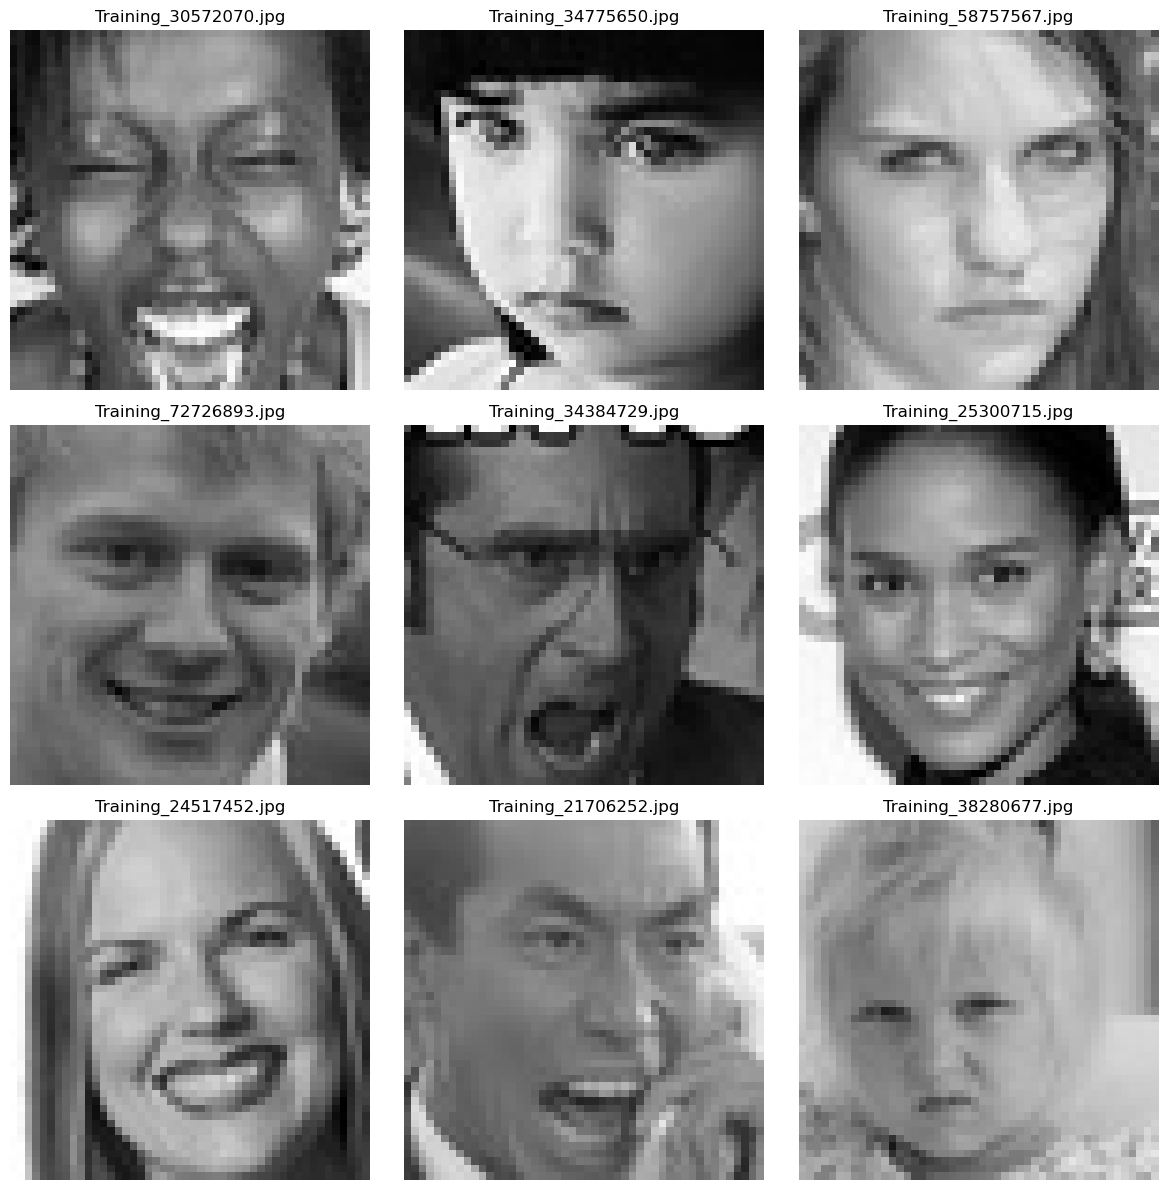

In [5]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random

images = glob("train/**/**", recursive=True)

# Show 9 random images
plt.figure(figsize=(12, 12))

for i in range(9):
    image = random.choice(images)
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(image))

plt.tight_layout()
plt.show()


## Preparing Data for training


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 48
batch_size = 64

# Data generator for training
datagen_train = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(
    "train/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

# Data generator for validation
datagen_validation = ImageDataGenerator()

validation_generator = datagen_validation.flow_from_directory(
    "test/",
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#### Defining model


In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint


In [14]:
def Convulution(input_tensor, filters, kernel_size):
    x=Conv2D(filters=filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    return x

In [15]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    return x

In [16]:
def model_fer(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Convulution(inputs, 32, (3, 3))
    x = Convulution(x, 64, (5, 5))
    x = Convulution(x, 128, (3, 3))
    
    x = Flatten()(x)
    x = Dense_f(x, 256)
    outputs = Dense(7, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [17]:
model = model_fer((48, 48, 1))
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 48, 48, 1)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_6 (Conv2D)             │ (None, 48, 48, 32)    │          320 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_8         │ (None, 48, 48, 32)    │          128 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_8 (Activation)     │ (None, 48, 48, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 24, 24, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_8 (Dropout)           │ (None, 24, 24, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_7 (Conv2D)             │ (None, 24, 24, 64)    │       51,264 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_9         │ (None, 24, 24, 64)    │          256 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_9 (Activation)     │ (None, 24, 24, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 12, 12, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_9 (Dropout)           │ (None, 12, 12, 64)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_8 (Conv2D)             │ (None, 12, 12, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_10        │ (None, 12, 12, 128)   │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_10 (Activation)    │ (None, 12, 12, 128)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 6, 6, 128)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_10 (Dropout)          │ (None, 6, 6, 128)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_2 (Flatten)           │ (None, 4608)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_4 (Dense)               │ (None, 256)           │    1,179,904 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_11        │ (None, 256)           │        1,024 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ activation_11 (Activation)    │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_11 (Dropout)          │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 7)             │        1,799 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

#### Initializing Model

In [19]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint = ModelCheckpoint(
    "model_weights.weights.h5",   # ✅ must end in .weights.h5
    monitor='val_accuracy',
    save_weights_only=True,
    mode='max',
    verbose=1
)
callbacks = [checkpoint]

## Training the Model

In [20]:
history=model.fit(
x=train_generator,
steps_per_epoch=steps_per_epoch,
epochs=epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks=callbacks)

C:\Users\HP\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2988 - loss: 1.8533
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 624s 1s/step - accuracy: 0.2989 - loss: 1.8529 - val_accuracy: 0.3749 - val_loss: 1.8045
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:21 182ms/step - accuracy: 0.4375 - loss: 1.5589

C:\Users\HP\anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.4375 - loss: 1.5589 - val_accuracy: 0.3998 - val_loss: 1.6786
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4543 - loss: 1.4267
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 210ms/step - accuracy: 0.4543 - loss: 1.4266 - val_accuracy: 0.4745 - val_loss: 1.3965
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:20 179ms/step - accuracy: 0.5000 - loss: 1.3890
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5000 - loss: 1.3890 - val_accuracy: 0.4616 - val_loss: 1.4396
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5109 - loss: 1.2874
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.5109 - loss: 1.2873 - val_accuracy: 0.4632 - val_loss: 1.3623
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:19 177ms/step -

## Model Evaluation


In [21]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.5115 - loss: 1.3067


[1.2985234260559082, 0.5189467668533325]

## Plotting Loss

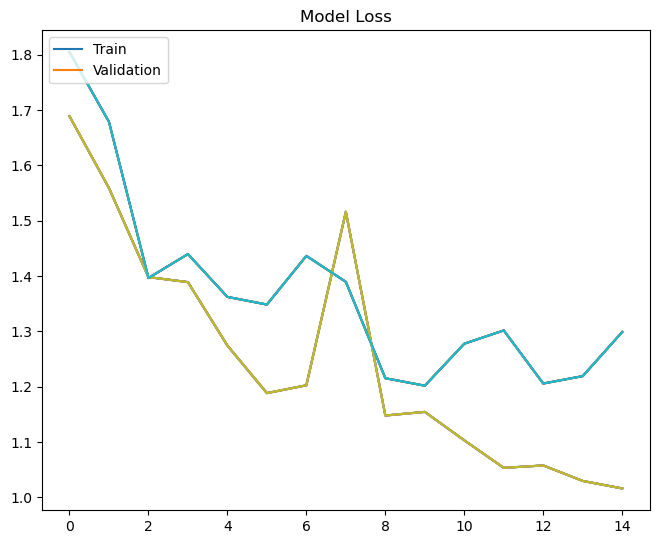

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0, right =0.95,left=0.0,hspace=0.25, wspace=0.35)
plt.show()

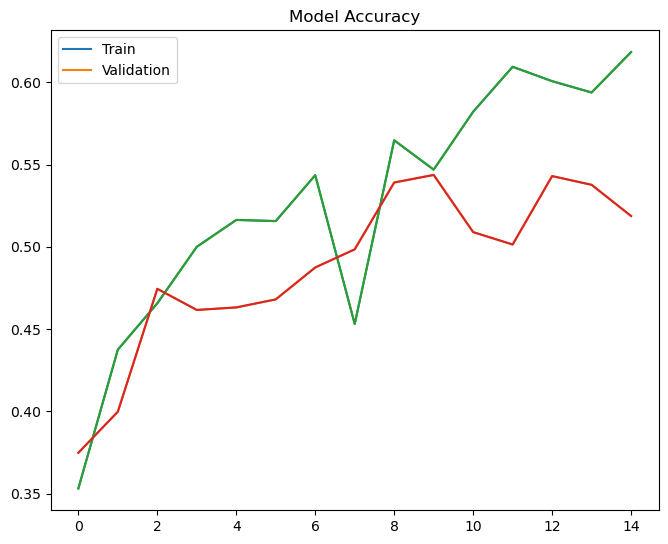

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0, right =0.95,left=0.0,hspace=0.25, wspace=0.35)
plt.show()

### Saving Model


In [34]:
model_json =model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)